# Mundo 25

### Análise de dados

### Rolling: como criar médias móveis e janelas de volatilidade de uma ação com uma linha de código

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np

In [2]:
dados_acao = yf.download("PETR4.SA", "2010-01-01", "2022-08-31")["Close"]

dados_acao = dados_acao.to_frame()

[*********************100%***********************]  1 of 1 completed


In [3]:
dados_acao

,Close
Date,
2010-01-04,37.320000
2010-01-05,37.000000
2010-01-06,37.500000
2010-01-07,37.150002
2010-01-08,36.950001
...,...
2022-08-24,33.639999
2022-08-25,33.279999
2022-08-26,33.639999


In [4]:
media_movel_250d = dados_acao.rolling(250).mean()

media_movel_250d

,Close
Date,
2010-01-04,NaN
2010-01-05,NaN
2010-01-06,NaN
2010-01-07,NaN
2010-01-08,NaN
...,...
2022-08-24,30.21752
2022-08-25,30.23972
2022-08-26,30.26432


In [5]:
dados_acao['MM250D'] = media_movel_250d.values

dados_acao = dados_acao.dropna()

dados_acao

,Close,MM250D
Date,,
2011-01-05,27.219999,29.68300
2011-01-06,27.110001,29.64216
2011-01-07,26.730000,29.60108
2011-01-10,26.980000,29.55900
2011-01-11,27.150000,29.51900
...,...,...
2022-08-24,33.639999,30.21752
2022-08-25,33.279999,30.23972
2022-08-26,33.639999,30.26432


<AxesSubplot: xlabel='Date'>

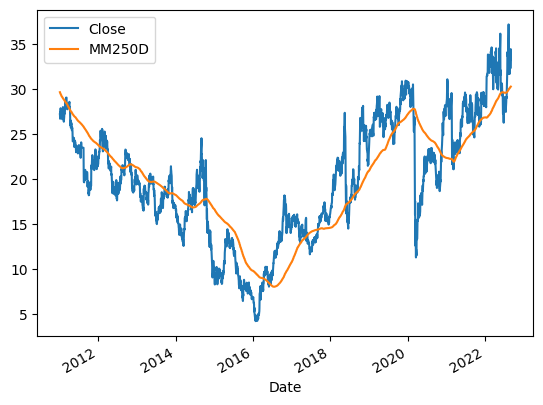

In [6]:
dados_acao.plot()

In [7]:
dados_acao['Ordem'] = np.where(dados_acao['Close']> dados_acao['MM250D'],"Compra","Venda")

dados_acao

C:\Users\Tiago\AppData\Local\Temp\ipykernel_78832\2675935085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_acao['Ordem'] = np.where(dados_acao['Close']> dados_acao['MM250D'],"Compra","Venda")


,Close,MM250D,Ordem
Date,,,
2011-01-05,27.219999,29.68300,Venda
2011-01-06,27.110001,29.64216,Venda
2011-01-07,26.730000,29.60108,Venda
2011-01-10,26.980000,29.55900,Venda
2011-01-11,27.150000,29.51900,Venda
...,...,...,...
2022-08-24,33.639999,30.21752,Compra
2022-08-25,33.279999,30.23972,Compra
2022-08-26,33.639999,30.26432,Compra


In [8]:
media_movel_exp = dados_acao["Close"].ewm(span = 250).mean()

media_movel_exp

Date
2011-01-05    27.219999
2011-01-06    27.164780
2011-01-07    27.018692
2011-01-10    27.008903
2011-01-11    27.037575
                ...    
2022-08-24    30.184482
2022-08-25    30.209147
2022-08-26    30.236485
2022-08-29    30.270297
2022-08-30    30.287506
Name: Close, Length: 2893, dtype: float64

<AxesSubplot: xlabel='Date'>

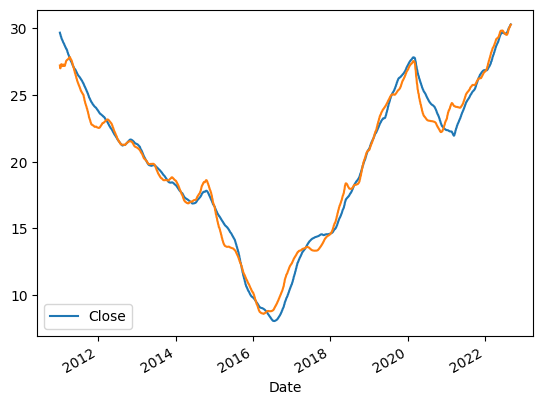

In [9]:
media_movel_250d.plot()
media_movel_exp.plot()

In [10]:
volatilidade_diaria_12m = dados_acao["Close"].pct_change().rolling(250).std()

volatilidade_diaria_12m

Date
2011-01-05         NaN
2011-01-06         NaN
2011-01-07         NaN
2011-01-10         NaN
2011-01-11         NaN
                ...   
2022-08-24    0.026154
2022-08-25    0.026163
2022-08-26    0.026163
2022-08-29    0.026111
2022-08-30    0.026386
Name: Close, Length: 2893, dtype: float64

In [11]:
volatilidade_diaria_12m = volatilidade_diaria_12m.dropna()

volatilidade_diaria_12m = volatilidade_diaria_12m*np.sqrt(252)

volatilidade_diaria_12m

Date
2012-01-05    0.284766
2012-01-06    0.284750
2012-01-09    0.284776
2012-01-10    0.284878
2012-01-11    0.284797
                ...   
2022-08-24    0.415177
2022-08-25    0.415324
2022-08-26    0.415322
2022-08-29    0.414500
2022-08-30    0.418868
Name: Close, Length: 2643, dtype: float64

<AxesSubplot: xlabel='Date'>

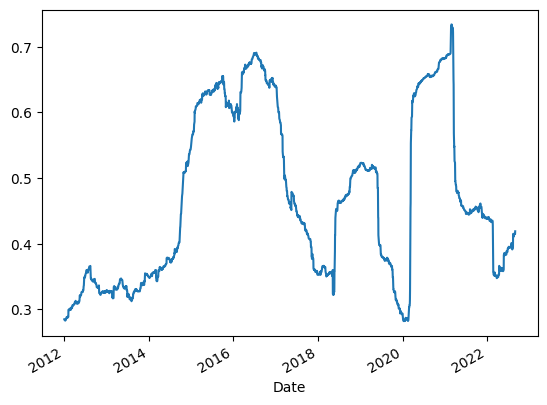

In [12]:
volatilidade_diaria_12m.plot()

# Exercícios
<BR>
    
* Exercício 81: Puxe dados de uma ação a sua escolha e calcule a média móvel de 30 dias desde 01/01/2020. Depois, identifique os sinais de compra ou venda, baseado na média móvel.
<BR>
    
* Exercício 82: Com os dados do exercício 81, calcule a média móvel exponencial de 30 dias.
<bR>
    
* Exercício 83: Com os dados do exercício 81, calcule a volatilidade dos retornos diários anualidada no período. 

In [ ]:
#gabarito 81

dados_acao = yf.download("WEGE3.SA", "2020-01-01", "2022-08-31")['Close']

dados_acao = dados_acao.to_frame()

dados_acao['MM30D'] = dados_acao.rolling(30).mean()

dados_acao = dados_acao.dropna()

dados_acao.plot()

In [ ]:
dados_acao['Ordem'] = np.where(dados_acao['Close'] > dados_acao['MM30D'], "Compra", "Venda")

dados_acao

In [ ]:
#gabarito 82
dados_acao = yf.download("WEGE3.SA", "2020-01-01", "2022-08-31")['Close']

dados_acao = dados_acao.to_frame()

dados_acao['EWM'] = dados_acao.ewm(span = 30).mean()

dados_acao.plot()

In [ ]:
#gabarito 83

dados_acao = yf.download("WEGE3.SA", "2020-01-01", "2022-08-31")['Close']

vol252d = dados_acao.pct_change().rolling(252).std()
vol252d = vol252d.dropna()
vol252d_anualizada = vol252d * np.sqrt(252)

vol252d_anualizada.plot()